# Data Cleaning and statistic Excercise
Julian Lopes Hinz, SoSe 2023

## Import Data

In [75]:
url_patient_info = "https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/data_clean/data/patient_info.csv"
url_hospital_visit = "https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/data_clean/data/date.csv"

In [76]:
import pandas as pd
df_patient = pd.read_csv(url_patient_info)
df_hospital = pd.read_csv(url_hospital_visit)

## Inspect Data

In [77]:
df_patient.head(100)


,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
95,1260244,Male,64,Previous,26.0951,2
96,1264270,Male,69,Never,24.8033,2
97,1274970,Female,56,Never,37.5391,2
98,1275182,Male,61,Never,26.9638,2


In [78]:
df_hospital.head(100)

,Participant_ID,VisitDate
0,1003300,1/7/2022
1,1003300,27/10/2021
2,1004025,19/05/2010
3,1005551,25/08/2021
4,1005551,29/06/2021
...,...,...
95,1209201,5/7/2019
96,1209201,6/8/2019
97,1212237,30/06/2015
98,1215978,13/02/2018


In [79]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant_ID  2218 non-null   int64  
 1   Sex             2218 non-null   object 
 2   Age             2218 non-null   int64  
 3   Smoking_status  2215 non-null   object 
 4   BMI             2199 non-null   float64
 5   Disease         2218 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 104.1+ KB


In [80]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Participant_ID  2891 non-null   int64 
 1   VisitDate       2807 non-null   object
dtypes: int64(1), object(1)
memory usage: 45.3+ KB


In [81]:
df_patient.describe()

,Participant_ID,Age,BMI,Disease
count,2.218000e+03,2218.000000,2199.000000,2218.000000
mean,3.556678e+06,61.470694,29.083625,1.744815
std,1.426639e+06,6.687583,5.576693,0.436063
min,1.003300e+06,6.000000,-31.413300,1.000000
25%,2.337478e+06,58.000000,25.512250,1.000000
50%,3.591072e+06,63.000000,28.183200,2.000000
75%,4.774338e+06,67.000000,32.015200,2.000000
max,6.020094e+06,70.000000,100.357000,2.000000


In [82]:
df_hospital.describe()

,Participant_ID
count,2.891000e+03
mean,3.571763e+06
std,1.429753e+06
min,1.003300e+06
25%,2.355413e+06
50%,3.597002e+06
75%,4.818746e+06
max,6.020094e+06


In [83]:
df_patient.count()

Participant_ID    2218
Sex               2218
Age               2218
Smoking_status    2215
BMI               2199
Disease           2218
dtype: int64

In [84]:
df_hospital.count()

Participant_ID    2891
VisitDate         2807
dtype: int64

In [85]:
df_patient.isna().sum()

Participant_ID     0
Sex                0
Age                0
Smoking_status     3
BMI               19
Disease            0
dtype: int64

## 1. The missing value from BMI can be replaced with the mean value of  its regarding gender


In [86]:
mean_bmi_by_gender = df_patient.groupby('Sex')['BMI'].mean()
print(mean_bmi_by_gender)

df_patient['BMI'] = df_patient.apply(lambda row: mean_bmi_by_gender[row['Sex']] if pd.isnull(row['BMI']) else row['BMI'], axis=1)


# Remove all na from smpking status:
df_patient.dropna(subset=['Smoking_status'], inplace=True)

Sex
Female    29.061755
Male      29.092445
Name: BMI, dtype: float64


In [87]:
df_patient.count()

Participant_ID    2215
Sex               2215
Age               2215
Smoking_status    2215
BMI               2215
Disease           2215
dtype: int64

In [88]:
df_patient.isna().sum()

Participant_ID    0
Sex               0
Age               0
Smoking_status    0
BMI               0
Disease           0
dtype: int64

## 2. Do the sanity check for all the columns in 2 files, and remove the sample which does not pass the sanity check

Patient_information:  

Patient_ID: numeric the patient id with 7 digits  
Sex: string Male or Female  
Age: numeric The Age of recruitment  
BMI: numeric Body Mass Index, should be between 15-60  
Smoking_status: string Never, Previous, current, Prefer not to answer  
Disease: factor 1 means disease, 2 means healthy  

Hosptial Visit:  

Patient_ID: numeric the patient id with 7 digits  
VisitDate: Date, the date of the patient's visit hospital. the data is collected from the year 1950 to 2023  

In [89]:
#Remove Patient_ID with non 7-digit number
print(len(df_patient))
df_patient = df_patient[(df_patient['Participant_ID'] > 999999) & (df_patient['Participant_ID'] < 10000000)]
print(len(df_patient))

2215
2215


In [90]:
print(len(df_hospital))
df_hospital = df_hospital[(df_hospital['Participant_ID'] > 999999) & (df_hospital['Participant_ID'] < 10000000)]
print(len(df_hospital))

2891
2891


In [91]:
# Sex
print(len(df_patient))
df_patient = df_patient[(df_patient['Sex'] == 'Male') | (df_patient['Sex'] == 'Female')]
print(len(df_patient))

2215
2215


In [92]:
#Age
print(len(df_patient))
df_patient = df_patient[(df_patient['Age'] > 0) & (df_patient['Age'] < 110)]
print(len(df_patient))

2215
2215


In [93]:
#BMI
print(len(df_patient))
df_patient = df_patient[(df_patient['BMI'] >= 15) & (df_patient['BMI'] <= 60)]
print(len(df_patient))

2215
2213


In [94]:
#Smoking
print(len(df_patient))
legal_status = ["Never", "Previous", "Current", "Prefer not to answer"]
df_patient = df_patient[df_patient['Smoking_status'].isin(legal_status)]
print(len(df_patient))

2213
2213


In [95]:
#Disease
print(len(df_patient))
df_patient = df_patient[(df_patient['Disease'] == 1) | (df_patient['Disease'] == 2)]
print(len(df_patient))
# df_patient['Disease'] = df_patient['Disease'].replace({1: 'disease', 2: 'healthy'})


2213
2213


In [96]:
#Date 
df_hospital.dropna(subset=['VisitDate'], inplace=True)
df_hospital['VisitDate'].dtype

dtype('O')

In [97]:

df_hospital['datetime'] = pd.to_datetime(df_hospital['VisitDate'], format='%d/%m/%Y')

In [98]:
# Remove duplicates
print(len(df_hospital))
df_hospital = df_hospital.loc[:, ~df_hospital.columns.duplicated()]
print(len(df_hospital))

2807
2807


## Apply Changes

In [99]:
# Remove all na from smpking status:
df_patient.dropna(subset=['Smoking_status'], inplace=True)

## Unite

In [100]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2217
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant_ID  2213 non-null   int64  
 1   Sex             2213 non-null   object 
 2   Age             2213 non-null   int64  
 3   Smoking_status  2213 non-null   object 
 4   BMI             2213 non-null   float64
 5   Disease         2213 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 121.0+ KB


In [101]:
patient_counts = df_hospital['Participant_ID'].value_counts()


In [102]:
patient_counts

Participant_ID
4957784    17
3203261    14
1667100    13
5537260     9
5065581     9
           ..
3312328     1
3309800     1
3303832     1
3303045     1
3590765     1
Name: count, Length: 2133, dtype: int64

In [103]:
df_patient_with_counts = df_patient.merge(patient_counts, left_on='Participant_ID', right_index=True, how='left')


In [104]:
df_patient_with_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2217
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant_ID  2213 non-null   int64  
 1   Sex             2213 non-null   object 
 2   Age             2213 non-null   int64  
 3   Smoking_status  2213 non-null   object 
 4   BMI             2213 non-null   float64
 5   Disease         2213 non-null   int64  
 6   count           2130 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 138.3+ KB


In [105]:
df_patient_with_counts['count'] = df_patient_with_counts['count'].fillna(0).astype(int)
df_patient_with_counts.rename(columns={'count': 'Number_of_visit'}, inplace=True)
df_patient_with_counts.rename(columns={'Participant_ID': 'Patient_ID'}, inplace=True)


In [106]:
df_patient_with_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2217
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient_ID       2213 non-null   int64  
 1   Sex              2213 non-null   object 
 2   Age              2213 non-null   int64  
 3   Smoking_status   2213 non-null   object 
 4   BMI              2213 non-null   float64
 5   Disease          2213 non-null   int64  
 6   Number_of_visit  2213 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 138.3+ KB


In [107]:
df_export = df_patient_with_counts[['Patient_ID', 'Sex', 'Age', 'BMI', 'Smoking_status', 'Number_of_visit', 'Disease']]
df_export.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2217
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient_ID       2213 non-null   int64  
 1   Sex              2213 non-null   object 
 2   Age              2213 non-null   int64  
 3   BMI              2213 non-null   float64
 4   Smoking_status   2213 non-null   object 
 5   Number_of_visit  2213 non-null   int64  
 6   Disease          2213 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 138.3+ KB


In [108]:
df_export.to_csv('dataframe_export.csv', index=False)

# Statistics

In [117]:
url_patient_info = "./dataframe_export.csv"

In [118]:
import pandas as pd
df = pd.read_csv(url_patient_info)

In [119]:
df.head(100)

,Patient_ID,Sex,Age,BMI,Smoking_status,Number_of_visit,Disease
0,1003300,Male,62,33.7597,Previous,2,2
1,1004025,Male,60,28.1173,Previous,1,1
2,1005551,Male,69,26.4159,Previous,2,2
3,1005594,Male,64,24.7550,Previous,1,1
4,1005624,Male,64,35.0773,Previous,2,2
...,...,...,...,...,...,...,...
95,1260244,Male,64,26.0951,Previous,1,2
96,1264270,Male,69,24.8033,Never,1,2
97,1274970,Female,56,37.5391,Never,1,2
98,1275182,Male,61,26.9638,Never,1,2


1. **Is the BMI different between the healthy and control group? make the box/violin chart**


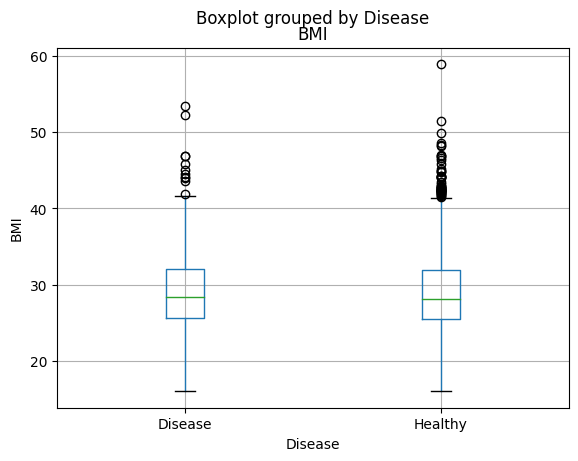

In [120]:
import matplotlib.pyplot  as plt 

# Create a box plot
df.boxplot(column='BMI', by='Disease')

# Add labels and title
plt.xlabel('Disease')
plt.ylabel('BMI')

plt.xticks([1, 2], ['Disease', 'Healthy'])

# Show the plot
plt.show()

> It seems like the median BMI of healthy people is slightly lower than people with a disease. However, there are more healthy people that reach over the upper whiskers.
Generally we can say that there are noticeable differences between the BMI of healthy people and the ones with a disease.

2. **Is the proportion of Smoke status different between the healthy and control group?**

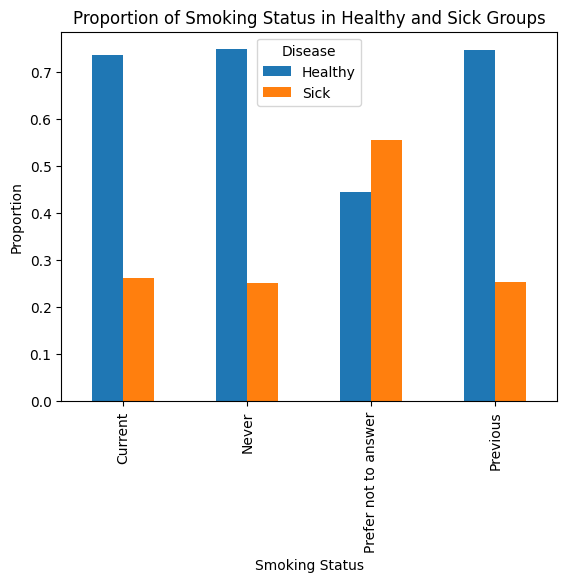

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping the disease values to labels
df['Disease'] = df['Disease'].map({1: 'Sick', 2: 'Healthy'})

# Grouping the data by 'Smoking_status' and 'Disease' and calculating the frequencies
grouped_data = df.groupby(['Smoking_status', 'Disease']).size().unstack()

# Handling missing values
grouped_data = grouped_data.fillna(0)

# Calculating the proportions by dividing each row by its sum
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Plotting the grouped bar chart
proportions.plot(kind='bar')

# Setting the title and labels
plt.title("Proportion of Smoking Status in Healthy and Sick Groups")
plt.xlabel("Smoking Status")
plt.ylabel("Proportion")

# Displaying the bar chart
plt.show()


> It seems like generally sick people are less willing to give their smoking status than healthy people. 
However, comparing the other statuses "Current", "Never" and "Previous", the occurrences of healthy and sick people evenly distribute throughout each of the three categories with barely visible differences.

3. **Is the smoke status related to the number of Hospital visits regardless of the disease? (ignore the "Prefer not to answer")**

> Antwort

4. **Is the number of visits higher in the Disease group than in the Healthy group?**


> Answer

5. **Do Male has a higher current smoke percentage compared to Female?**


> Answer